In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [3]:
training_epochs = 15
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
data_loader = DataLoader(dataset = mnist_train, batch_size = batch_size,
                        shuffle = True, drop_last=True)

In [6]:
linear = nn.Linear(784,10, bias=True).to(device)

In [7]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1,28*28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 0.534734666
Epoch: 0002 cost = 0.359445751
Epoch: 0003 cost = 0.331012428
Epoch: 0004 cost = 0.316387355
Epoch: 0005 cost = 0.306937128
Epoch: 0006 cost = 0.300358146
Epoch: 0007 cost = 0.294956416
Epoch: 0008 cost = 0.290867537
Epoch: 0009 cost = 0.287347078
Epoch: 0010 cost = 0.284506738
Epoch: 0011 cost = 0.282068402
Epoch: 0012 cost = 0.279895455
Epoch: 0013 cost = 0.277844787
Epoch: 0014 cost = 0.276107043
Epoch: 0015 cost = 0.274485141
Learning finished


Accuracy: 0.8884999752044678
Label :  8
Prediction:  8


C:\Users\mllab_808\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\mllab_808\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


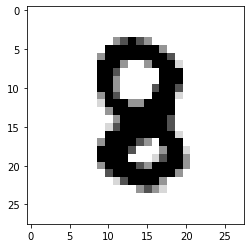

In [9]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:',accuracy.item())
    
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print("Label : ", Y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()